### Information

In [ ]:
#Class One: The Data Science Revolution
#Introductory Tutorial on linear regression for People Analytics 
#Professor Douglas Guilbeault
#January 2021

#This Tutorial is adapted from: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
#You are encouraged to view the original source for further detail. 
#Note: this is a basic introduction and should be used as a launch pad for those seeking to learn more 
#about how to run regressions for People Analytics. Please write to me if you would like to learn more 
#how running regressions for the purposes of Analytics: douglas.guilbeault@haas.berkeley.edu

### Load Libraries 

In [2]:
#if you don't have these libraries downloaded in python, a popular and easy way to download them is to 
#run the following command in this notebook: "!pip install package_name" (replace package_name with 
#ctual package name)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### First we will walk through how to run a regression prediction manually

### Load Data

In [27]:
# Generate data (this data is generated randomly)

np.random.seed(0)
remote_hours = 2.5 * np.random.randn(100) + 20   # Array of 100 values 
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms (i.e. error and variation not explained by remote ho)
worker_productivity = 2 + 0.3 * remote_hours + res  # Actual values of Y

# Create pandas dataframe to store our X and y values
data = pd.DataFrame(
    {'remote_hours': remote_hours,
     'worker_productivity': worker_productivity}
)

# Show the first five rows of our dataframe
data.head()

#Note: for this exercise, a basic dataset was constructed; 
#If you want to load in your own data and run the analysis below
#its as simple as getting your data into an excel .csv file type
#and using the following command: data = pd.read_csv('name_of_data_file.csv')

,remote_hours,worker_productivity
0,24.410131,10.264615
1,21.000393,7.626238
2,22.446845,8.098811
3,25.602233,10.165368
4,24.668895,8.814107


### Build Regression Model

In [28]:
xmean = np.mean(remote_hours)
ymean = np.mean(worker_productivity)

#beta = slope of predictor
#alpha = yintercept (expectation when beta is 0)
# Calculate the terms needed for the numator and denominator of beta 
data['xycov'] = (data['remote_hours'] - xmean) * (df['worker_productivity'] - ymean)
data['xvar'] = (data['remote_hours'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 1.5787828083407316
beta = 0.3229396867092763


In [29]:
#Model (Lineager regression equation)
ypred = alpha + beta * remote_hours

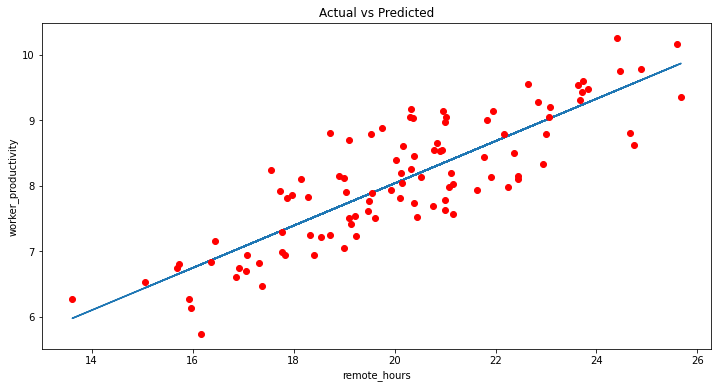

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(remote_hours, ypred)     # regression line
plt.plot(remote_hours, worker_productivity, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('remote_hours')
plt.ylabel('worker_productivity')

plt.show()

### Evaluate the Model Statistically

In [33]:
#This function automatically generates the regression line for you
#equation structure: y ~ x. Could easily by y ~ x + z + k (where z and k are additional predictors)
#y ~ x * k, here '*' indicates multiplication, which for regression indicates an 'interaction effect',
#that is, a predictor looks at whether the predictive value of x depends on k. 
#As this is not a stats class, we will not go into these details. 
#Please write me if you are interested in learning more: douglas.guilbeault@haas.berkeley.edu. 

lm1 = smf.ols(formula='worker_productivity ~ remote_hours', data=data).fit()

In [34]:
#view the parameters and their values. This is the regression equation. The value associated with 'remote hours'
#is the slope variable, and the intercept is (as expected) the intercept of the line (expected value when 
#remote hours is 0. 

lm1.params

Intercept       1.578783
remote_hours    0.322940
dtype: float64

In [35]:
#view statistical significance of predictor variables
#if remote_hours is less than 0.05, it is weakly significant. 
#Roughly, a p-value of less than 0.05 means there is roughly a 5% chance that the pattern you've observed is due 
#purely to chance rather than to your predictor variable
#A p-value of less 0.01 is considered highly significant. 
lm1.pvalues

Intercept       2.768885e-04
remote_hours    1.927535e-28
dtype: float64

In [36]:
#view the full summary of the model, including the overall amount of "worker_productivity" explained by the model, 
#which for us only contains "remote hours", so it's the amount of variation explained by remote hours per week. 
#We find that the model accounts for 71.5% of the variation among employees. That's good! 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     worker_productivity   R-squared:                       0.715
Model:                             OLS   Adj. R-squared:                  0.712
Method:                  Least Squares   F-statistic:                     245.5
Date:                 Wed, 20 Jan 2021   Prob (F-statistic):           1.93e-28
Time:                         19:17:20   Log-Likelihood:                -75.359
No. Observations:                  100   AIC:                             154.7
Df Residuals:                       98   BIC:                             159.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5788      0.419      3.772      0.000       0.748       2.409
remote_hours     0.3229      0.021     15.669      0.000       0.282       0.364
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""